Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')

In [2]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
library(tidyverse)
library(dendextend)
library(caret)
set.seed(321)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree


Loading required pack

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
my_columns <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
dataset = airbnb[my_columns]
head(dataset)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


Nos quedaremos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid = dataset %>% filter(City == "Madrid" & Room.Type == "Entire home/apt")
df_madrid = select(df_madrid,-c("City","Room.Type"))
df_madrid = df_madrid[df_madrid$Neighbourhood != '',]
head(df_madrid)
str(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
6,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
7,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


'data.frame':	5601 obs. of  12 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 257 217 257 179 109 109 179 109 109 179 ...
 $ Accommodates        : int  2 4 8 2 2 3 2 6 4 2 ...
 $ Bathrooms           : num  1 1 3 1 NA 1 1 1 1 1 ...
 $ Bedrooms            : int  1 1 3 1 1 0 0 2 0 1 ...
 $ Beds                : int  1 2 4 1 NA 2 1 3 2 1 ...
 $ Price               : int  85 112 190 71 34 60 45 120 50 63 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 2 6 1 1 1 1 6 2 1 ...
 $ Extra.People        : int  0 5 40 0 6 0 0 30 8 0 ...
 $ Review.Scores.Rating: int  95 99 96 90 88 100 87 100 86 100 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.71 -3.72 -3.71 -3.7 ...


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
# Hacemos la conversión de Sqft a m2
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903
df_madrid = select(df_madrid,-"Square.Feet")

In [6]:
print(paste("El porcentaje de apartamentos con NA en superficie es: ", round(sum(is.na(df_madrid$Square.Meters))/length(df_madrid$Square.Meters)*100,2),"%"))

[1] "El porcentaje de apartamentos con NA en superficie es:  93.8 %"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [7]:
print(paste("El porcentaje de apartamentos pedido es: ",
            round(sum(df_madrid$Square.Meters == 0,na.rm = T)/sum(!is.na(df_madrid$Square.Meters))*100,2),
            "%"))

[1] "El porcentaje de apartamentos pedido es:  36.89 %"


Reemplazar todos los 0m^2 por NA 

In [8]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA


summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


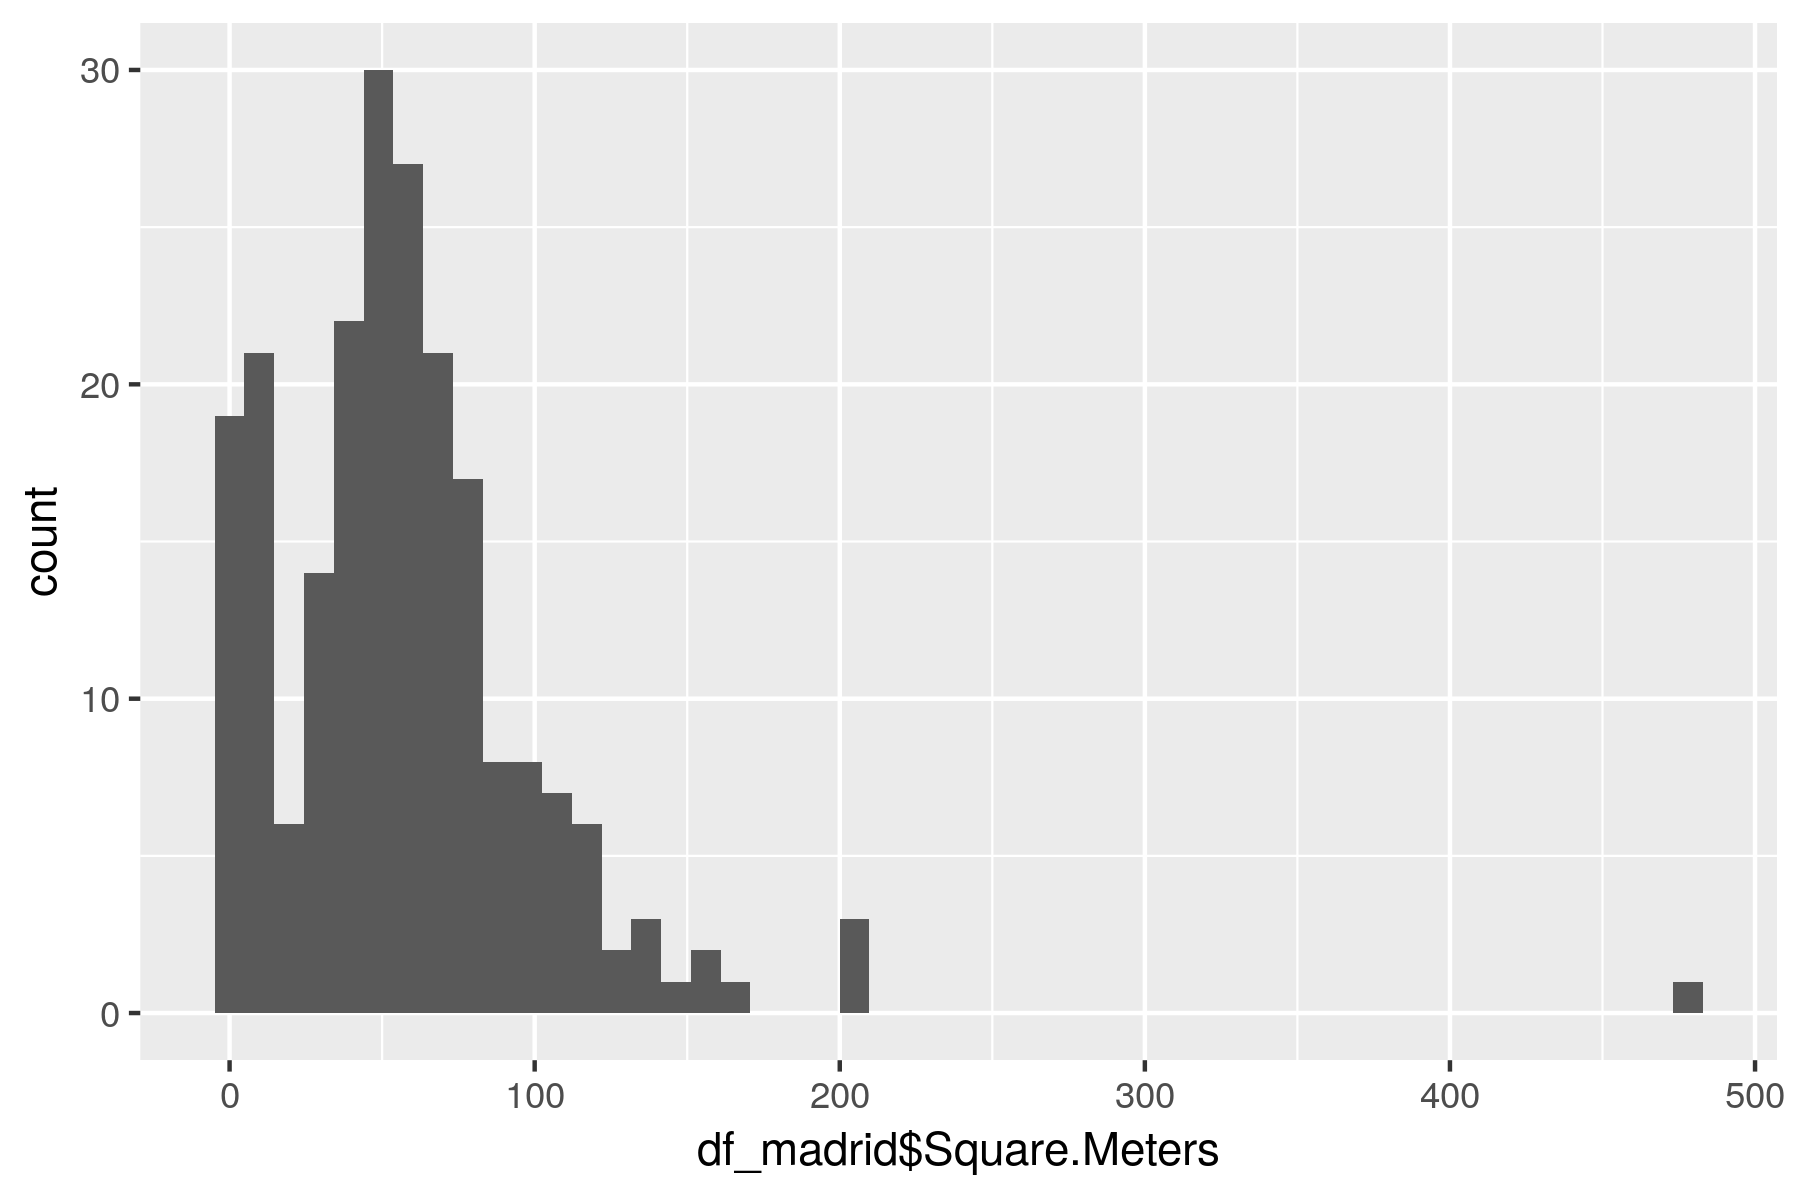

In [9]:
ggplot(df_madrid, aes(x = df_madrid$Square.Meters)) + geom_histogram(bins = 50)

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


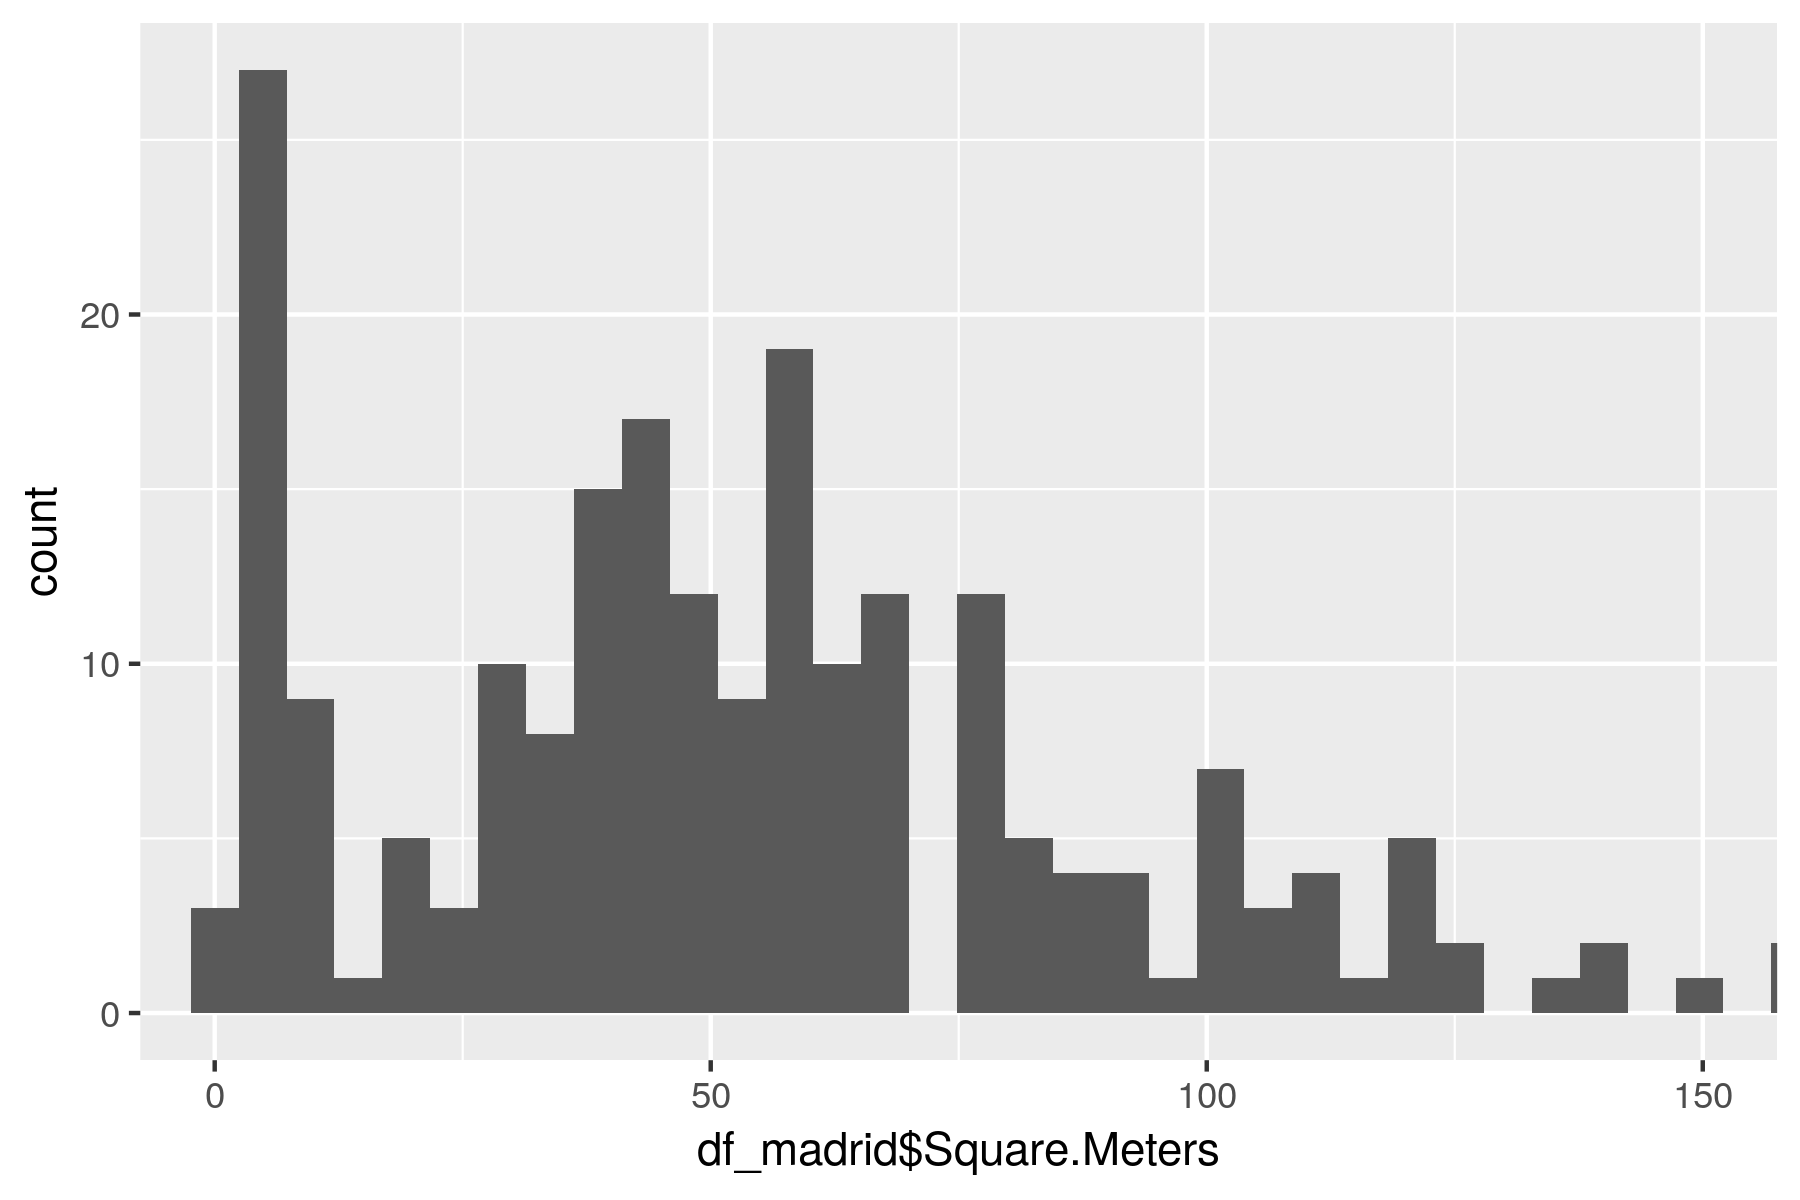

In [10]:
ggplot(df_madrid, aes(x = df_madrid$Square.Meters)) + coord_cartesian(xlim = c(0,150)) + geom_histogram(bins = 100) 

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [11]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA

summary(df_madrid)


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




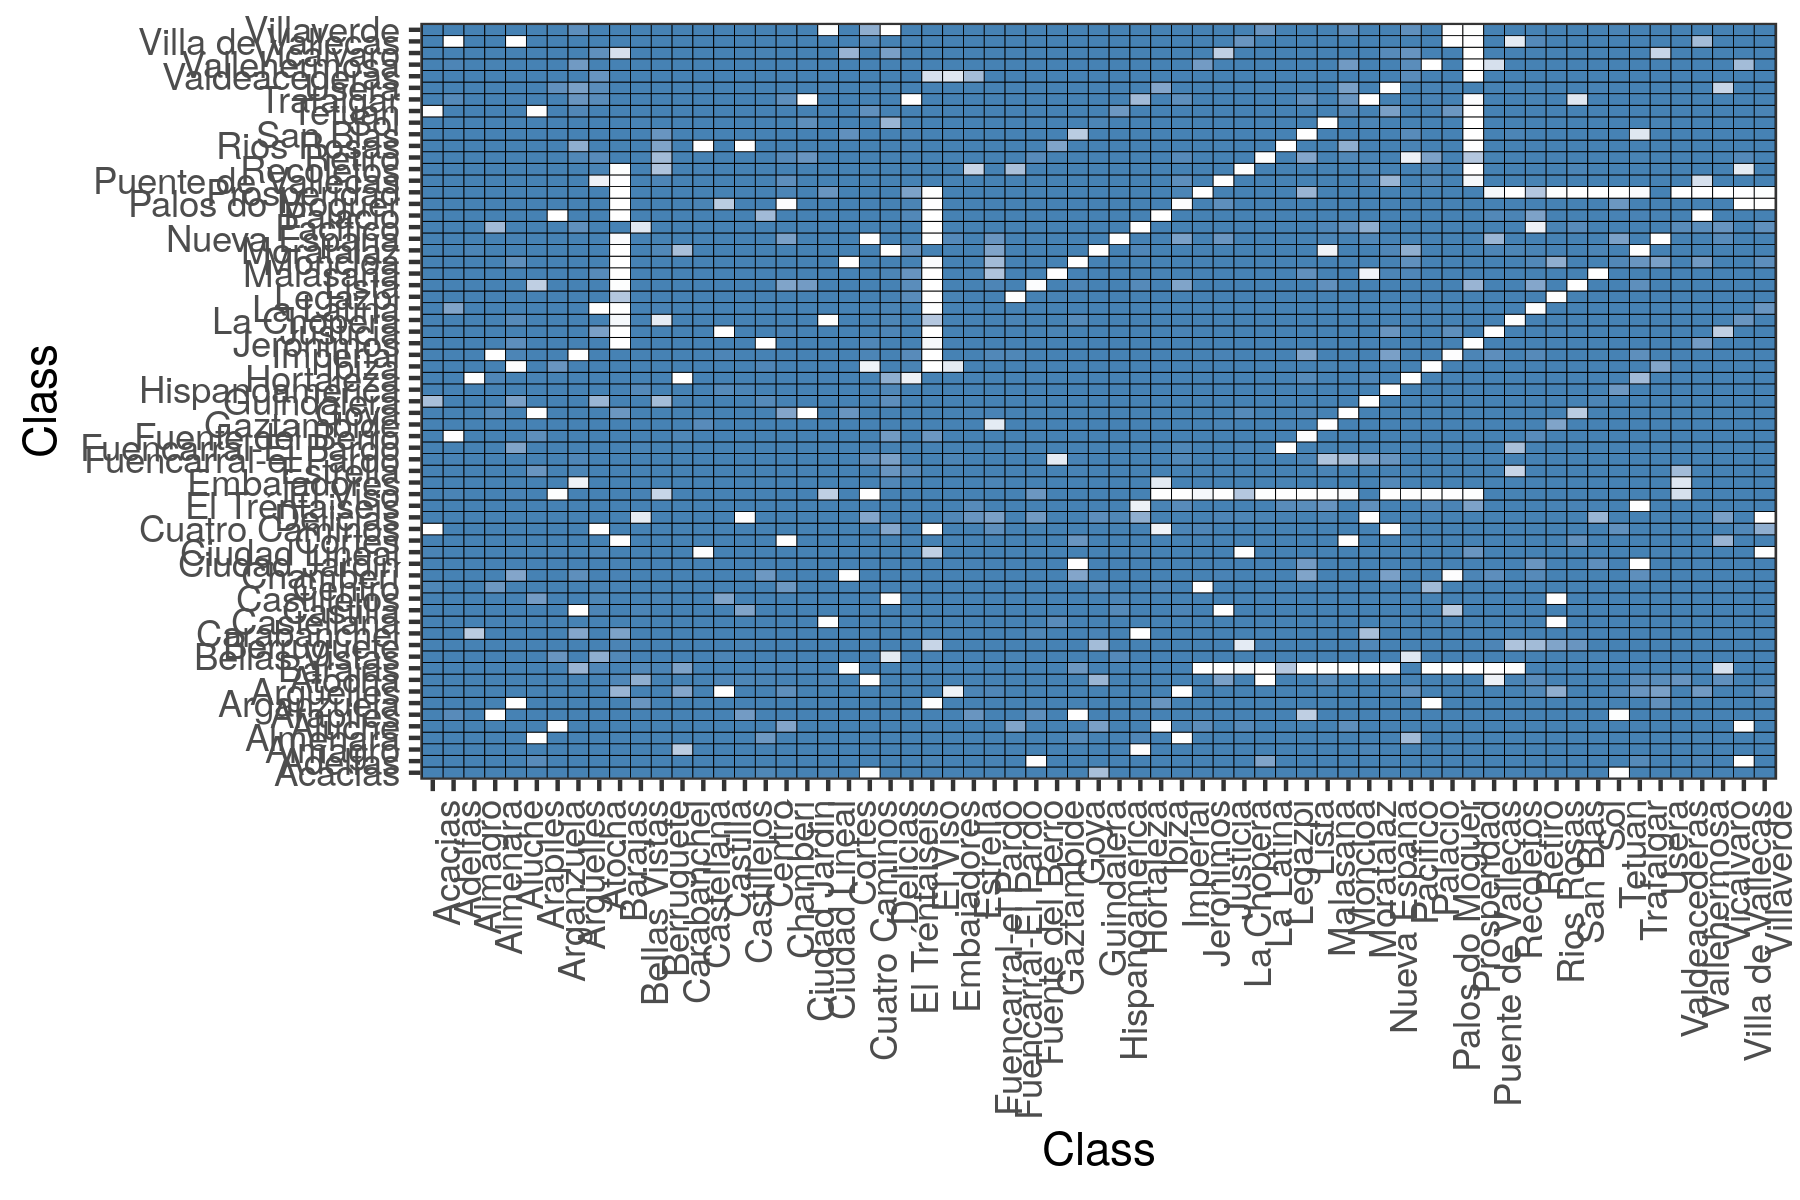

In [12]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [13]:
d <- as.dist(1 - resm)

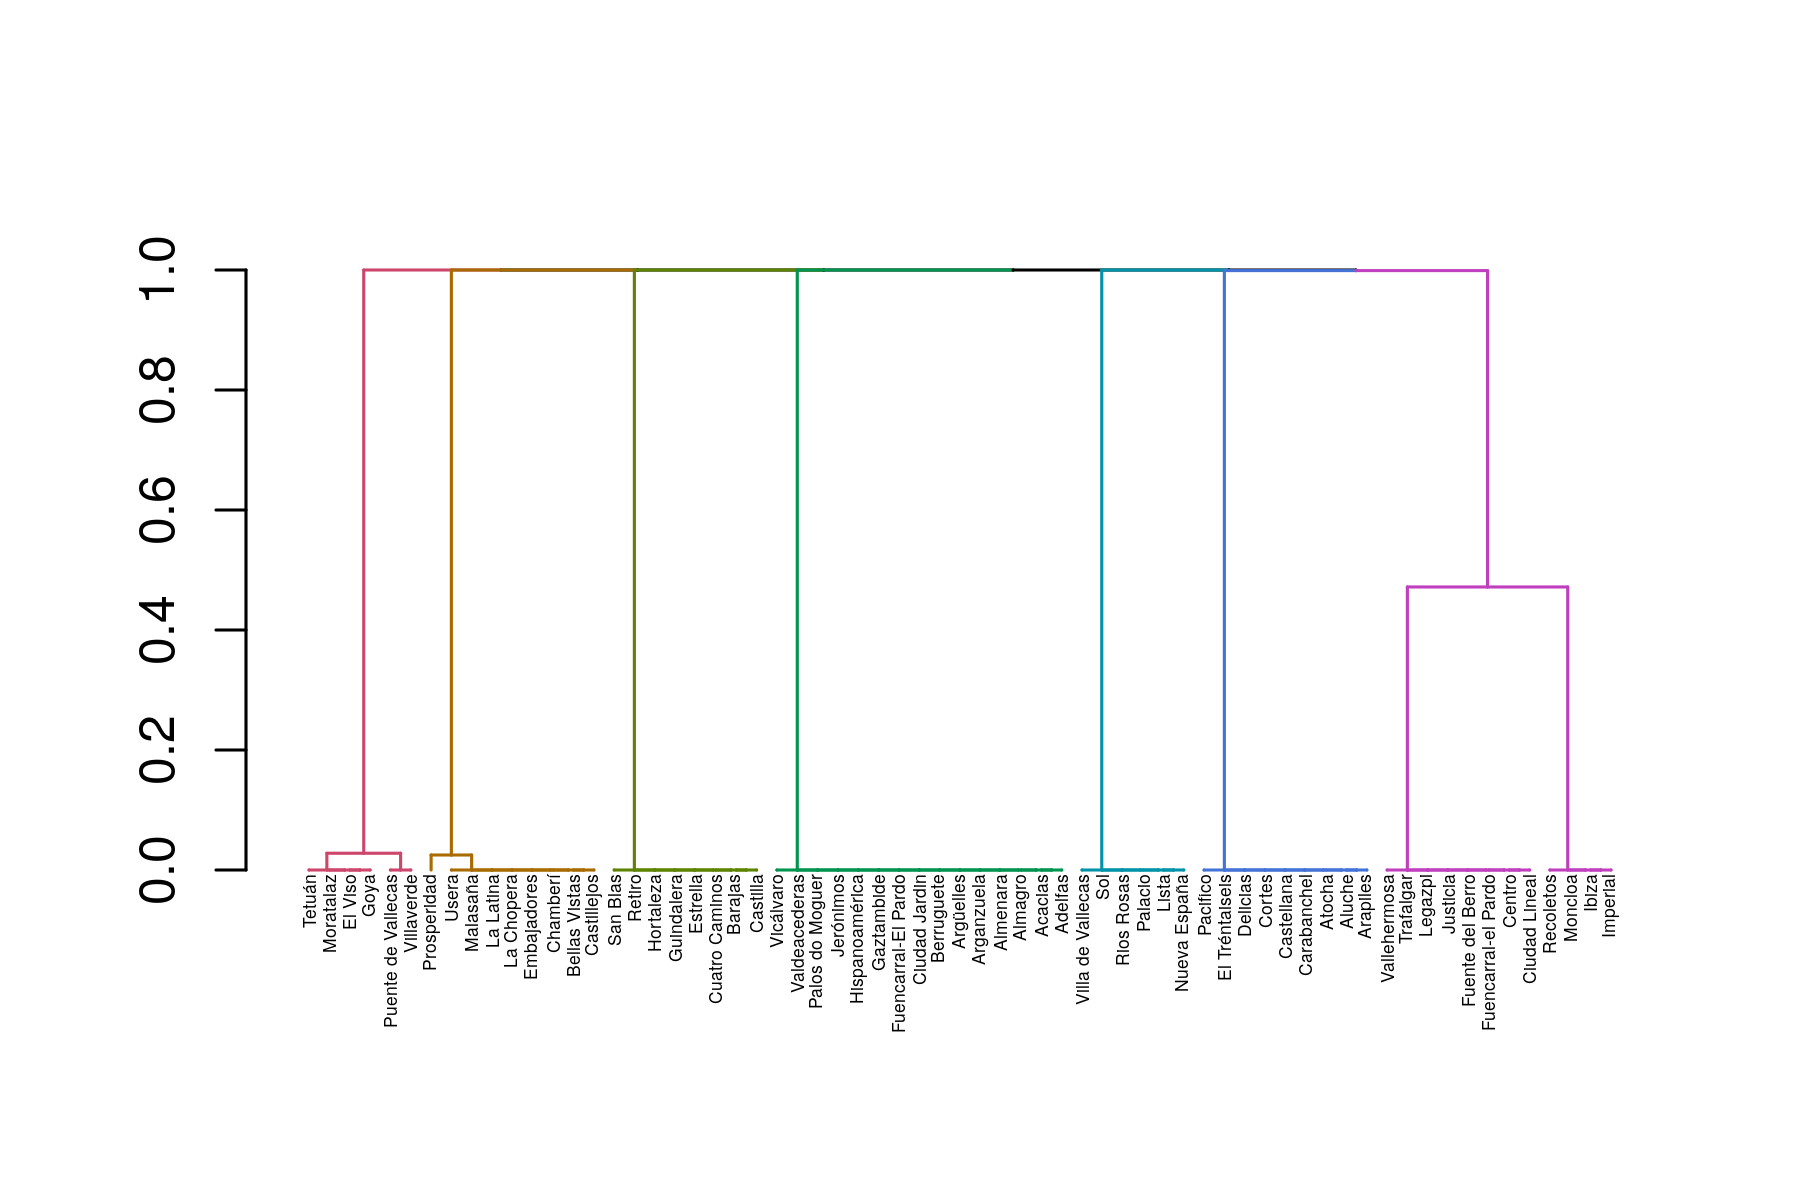

In [14]:
madrid.tree <- hclust(d, method = "complete")
madrid.dend <- as.dendrogram(madrid.tree)
madrid.dend <- set(madrid.dend,"labels_cex", 0.35) 

plot(color_branches(madrid.dend,h=0.9, horiz = TRUE, cex = 0))

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

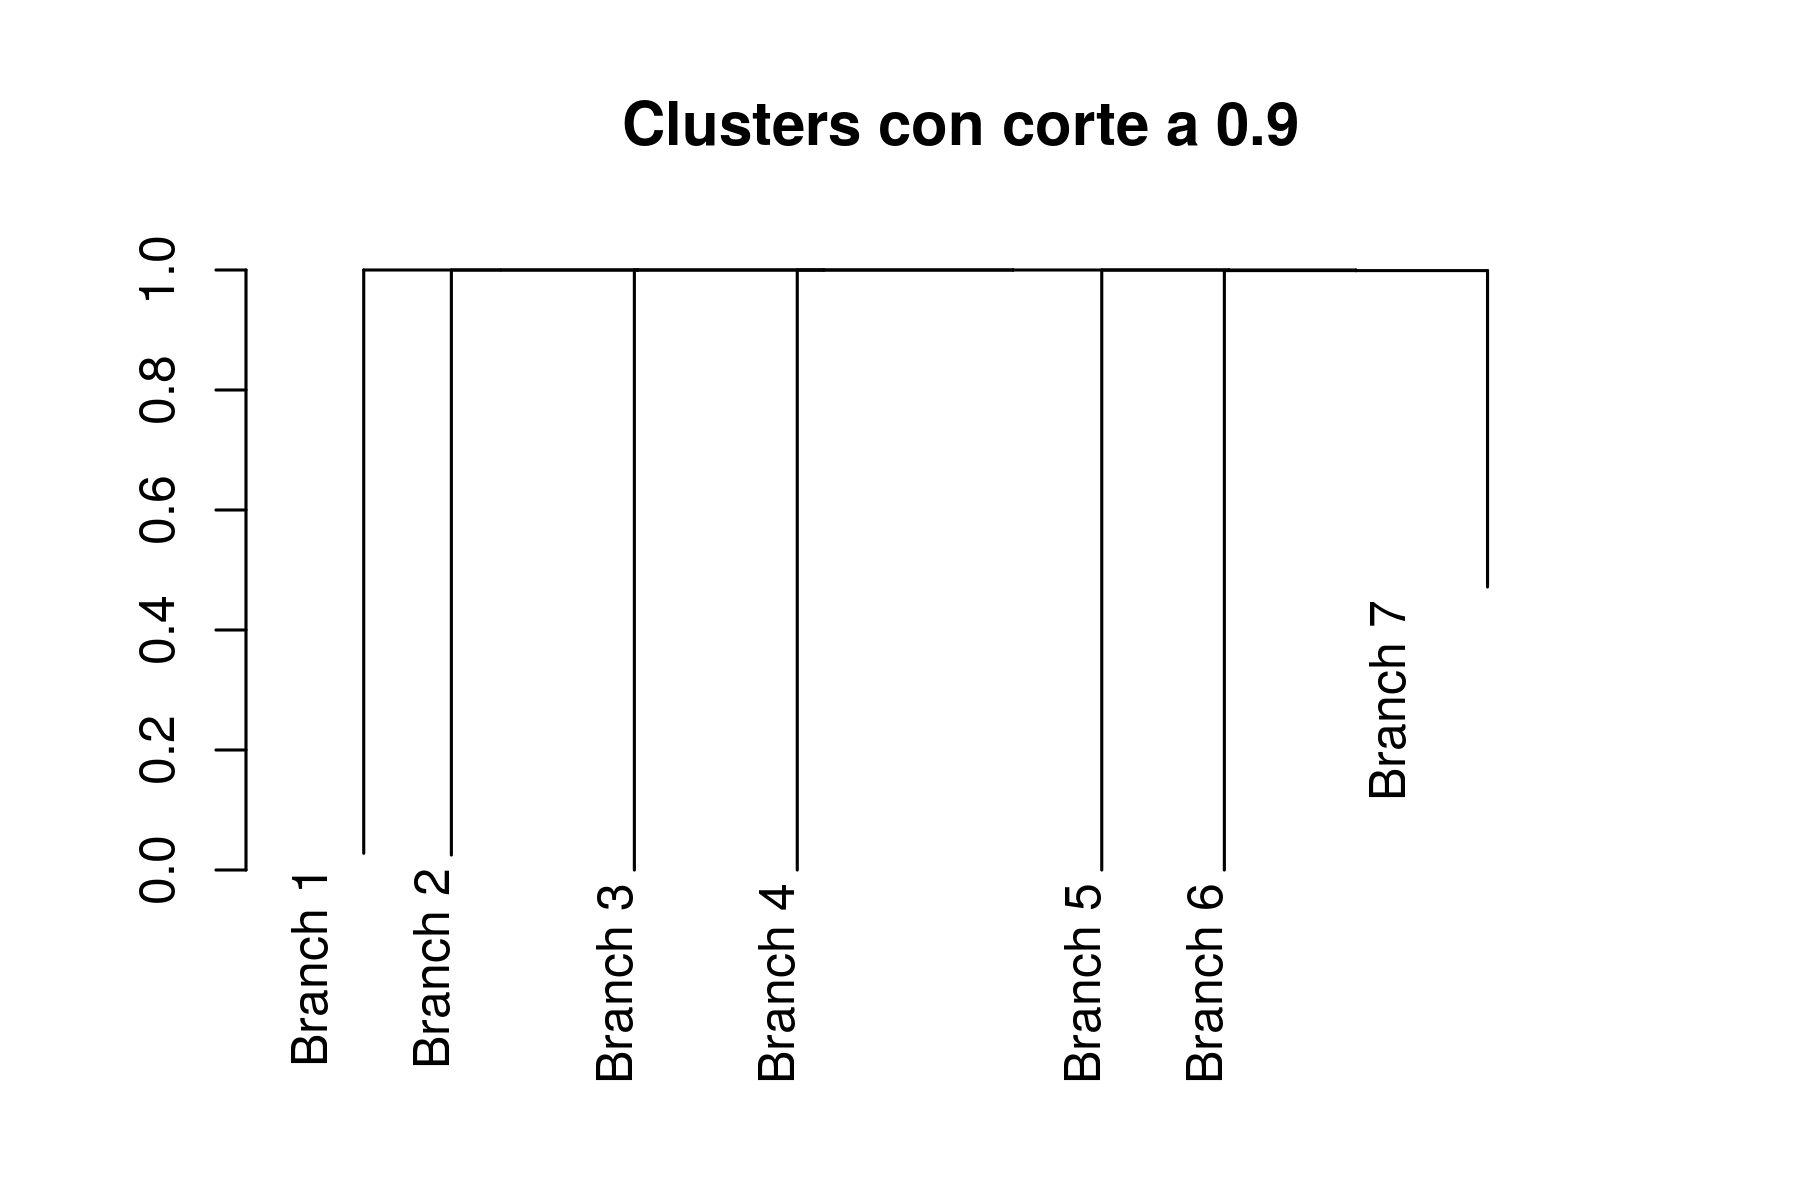

In [15]:
plot(cut(madrid.dend, h = 0.9)$upper, main = "Clusters con corte a 0.9")

In [16]:
cut(madrid.dend, h = 0.9)$lower

[[1]]
'dendrogram' with 2 branches and 6 members total, at height 0.0279 

[[2]]
'dendrogram' with 2 branches and 9 members total, at height 0.025 

[[3]]
'dendrogram' with 2 branches and 8 members total, at height 0 

[[4]]
'dendrogram' with 2 branches and 15 members total, at height 0 

[[5]]
'dendrogram' with 2 branches and 6 members total, at height 0 

[[6]]
'dendrogram' with 2 branches and 9 members total, at height 0 

[[7]]
'dendrogram' with 2 branches and 12 members total, at height 0.4717 


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [17]:
clusters <- cutree(madrid.dend, h = 0.9)
clusters['Embajadores']

Embajadores 
          4

In [18]:
df_madrid$neighb_id <- clusters[as.character(df_madrid$Neighbourhood)]
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)
head(df_madrid)



#df_madrid <- mutate(df_madrid, neighb_id = as.factor(clusters[Neighbourhood]))
#head(df_madrid)

#dim(df_madrid)
str(df_madrid %>% filter(!is.na(Square.Meters)))
summary(df_madrid %>% filter(!is.na(neighb_id)))

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,NA,7
2,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,NA,4
3,Palacio,8,3,3,4,190,6,40,96,40.41651,-3.717843,NA,7
4,La Latina,2,1,1,1,71,1,0,90,40.41200,-3.706691,NA,4
6,Embajadores,2,NA,1,NA,34,1,6,88,40.40809,-3.700322,NA,4
7,Embajadores,3,1,0,2,60,1,0,100,40.41085,-3.701099,NA,4


'data.frame':	174 obs. of  13 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 317 81 81 255 169 217 56 57 217 109 ...
 $ Accommodates        : int  5 9 4 4 3 5 7 6 2 3 ...
 $ Bathrooms           : num  1 2 2 1 1 2.5 2 2 1 1 ...
 $ Bedrooms            : int  2 3 1 2 0 3 3 2 0 1 ...
 $ Beds                : int  5 8 1 3 1 3 6 4 1 2 ...
 $ Price               : int  100 100 46 77 53 73 450 85 75 85 ...
 $ Guests.Included     : int  2 4 2 2 1 2 1 4 1 2 ...
 $ Extra.People        : int  5 10 7 15 10 10 0 10 0 8 ...
 $ Review.Scores.Rating: int  91 90 93 95 90 96 NA 100 67 93 ...
 $ Latitude            : num  40.4 40.5 40.5 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.7 -3.7 -3.68 -3.7 ...
 $ Square.Meters       : num  70 110 56 110 45 ...
 $ neighb_id           : Factor w/ 7 levels "1","2","3","4",..: 7 3 3 2 5 4 2 3 4 4 ...


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People   
 Min.   : 1.000   Min.   : 10.00   Min.   : 1.000   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.00  
 Mean   : 2.393   Mean   : 88.74   Mean   : 1.952   Mean   :  8.79  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.00  
 Max.   :16.000   Max.   :

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [19]:
# Lo primero que vamos a hacer para tratar de mejorar el modelo es preprocesar los datos con caret

In [20]:
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_madrid.train<-df_madrid[idx,]
df_madrid.test <-df_madrid[-idx,]

In [21]:
summary(df_madrid.train)

     Neighbourhood   Accommodates      Bathrooms       Bedrooms     
 Malasaña   : 474   Min.   : 1.000   Min.   :0.00   Min.   : 0.000  
 Embajadores: 407   1st Qu.: 3.000   1st Qu.:1.00   1st Qu.: 1.000  
 La Latina  : 395   Median : 4.000   Median :1.00   Median : 1.000  
 Sol        : 388   Mean   : 4.121   Mean   :1.25   Mean   : 1.464  
 Cortes     : 305   3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.: 2.000  
 Justicia   : 272   Max.   :16.000   Max.   :6.00   Max.   :10.000  
 (Other)    :1679                    NA's   :8      NA's   :5       
      Beds            Price       Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 10.0   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 57.0   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.0   Median : 2.000   Median : 10.000  
 Mean   : 2.394   Mean   : 88.8   Mean   : 1.947   Mean   :  8.716  
 3rd Qu.: 3.000   3rd Qu.:100.0   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :600.0   

In [22]:
summary(df_madrid.test)

     Neighbourhood  Accommodates      Bathrooms        Bedrooms     
 Malasaña   :205   Min.   : 1.000   Min.   :1.000   Min.   : 0.000  
 Embajadores:178   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  :176   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        :148   Mean   : 4.055   Mean   :1.244   Mean   : 1.425  
 Cortes     :136   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   :112   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :726                    NA's   :6       NA's   :2       
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 23.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 55.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 72.00   Median : 2.000   Median : 10.000  
 Mean   : 2.391   Mean   : 88.61   Mean   : 1.962   Mean   :  8.963  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Max.   :85

In [23]:
#hago un summary de los datos para ver si la separación es buena, y parece que sí. Donde mas variación hay es en Square.Meters, 
#muy probablemente por la falta de datos reales

In [24]:
model<-lm(formula=Square.Meters~neighb_id+Price+Bedrooms+Bathrooms+Accommodates+Extra.People+Beds+Guests.Included+Review.Scores.Rating, df_madrid.train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + Price + Bedrooms + Bathrooms + 
    Accommodates + Extra.People + Beds + Guests.Included + Review.Scores.Rating, 
    data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-113.71  -10.71    0.33    9.86  138.36 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -28.98139   28.27896  -1.025  0.30794    
neighb_id2           -22.86730   11.00209  -2.078  0.04025 *  
neighb_id3           -20.78363   13.18149  -1.577  0.11805    
neighb_id4           -27.17345    8.60200  -3.159  0.00210 ** 
neighb_id5           -23.77382   10.61217  -2.240  0.02731 *  
neighb_id6           -19.52165   19.31262  -1.011  0.31457    
neighb_id7           -17.93658    9.09074  -1.973  0.05128 .  
Price                  0.04818    0.04097   1.176  0.24244    
Bedrooms              15.05449    4.63164   3.250  0.00158 ** 
Bathrooms             36.51643    6.55808   5.568 2.21e-07 ***
Accommod

In [25]:
#esta primera prueba no es lo que estamos buscando, por lo que paso a definirle sobre qué columnas debería clasificar los datos
#nos quedamos con las mas relevantes, y las necesarias para la predicción de Sol de un poco más abajo.

In [26]:
model<-lm(formula=Square.Meters~neighb_id+Price+Bedrooms+Bathrooms+Accommodates, df_madrid.train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + Price + Bedrooms + Bathrooms + 
    Accommodates, data = df_madrid.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-113.198  -10.267   -1.869    9.358  173.296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.33254    9.78919   0.851 0.396561    
neighb_id2   -20.78388   10.75500  -1.932 0.055943 .  
neighb_id3   -29.23751   12.64907  -2.311 0.022725 *  
neighb_id4   -26.32055    8.83149  -2.980 0.003565 ** 
neighb_id5   -20.82325   10.80875  -1.927 0.056693 .  
neighb_id6   -18.05070   19.15337  -0.942 0.348096    
neighb_id7   -15.54554    9.14095  -1.701 0.091914 .  
Price          0.04227    0.03768   1.122 0.264463    
Bedrooms      16.80796    4.47672   3.755 0.000283 ***
Bathrooms     33.70378    6.53272   5.159 1.15e-06 ***
Accommodates   1.90099    2.14294   0.887 0.377019    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.03 

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

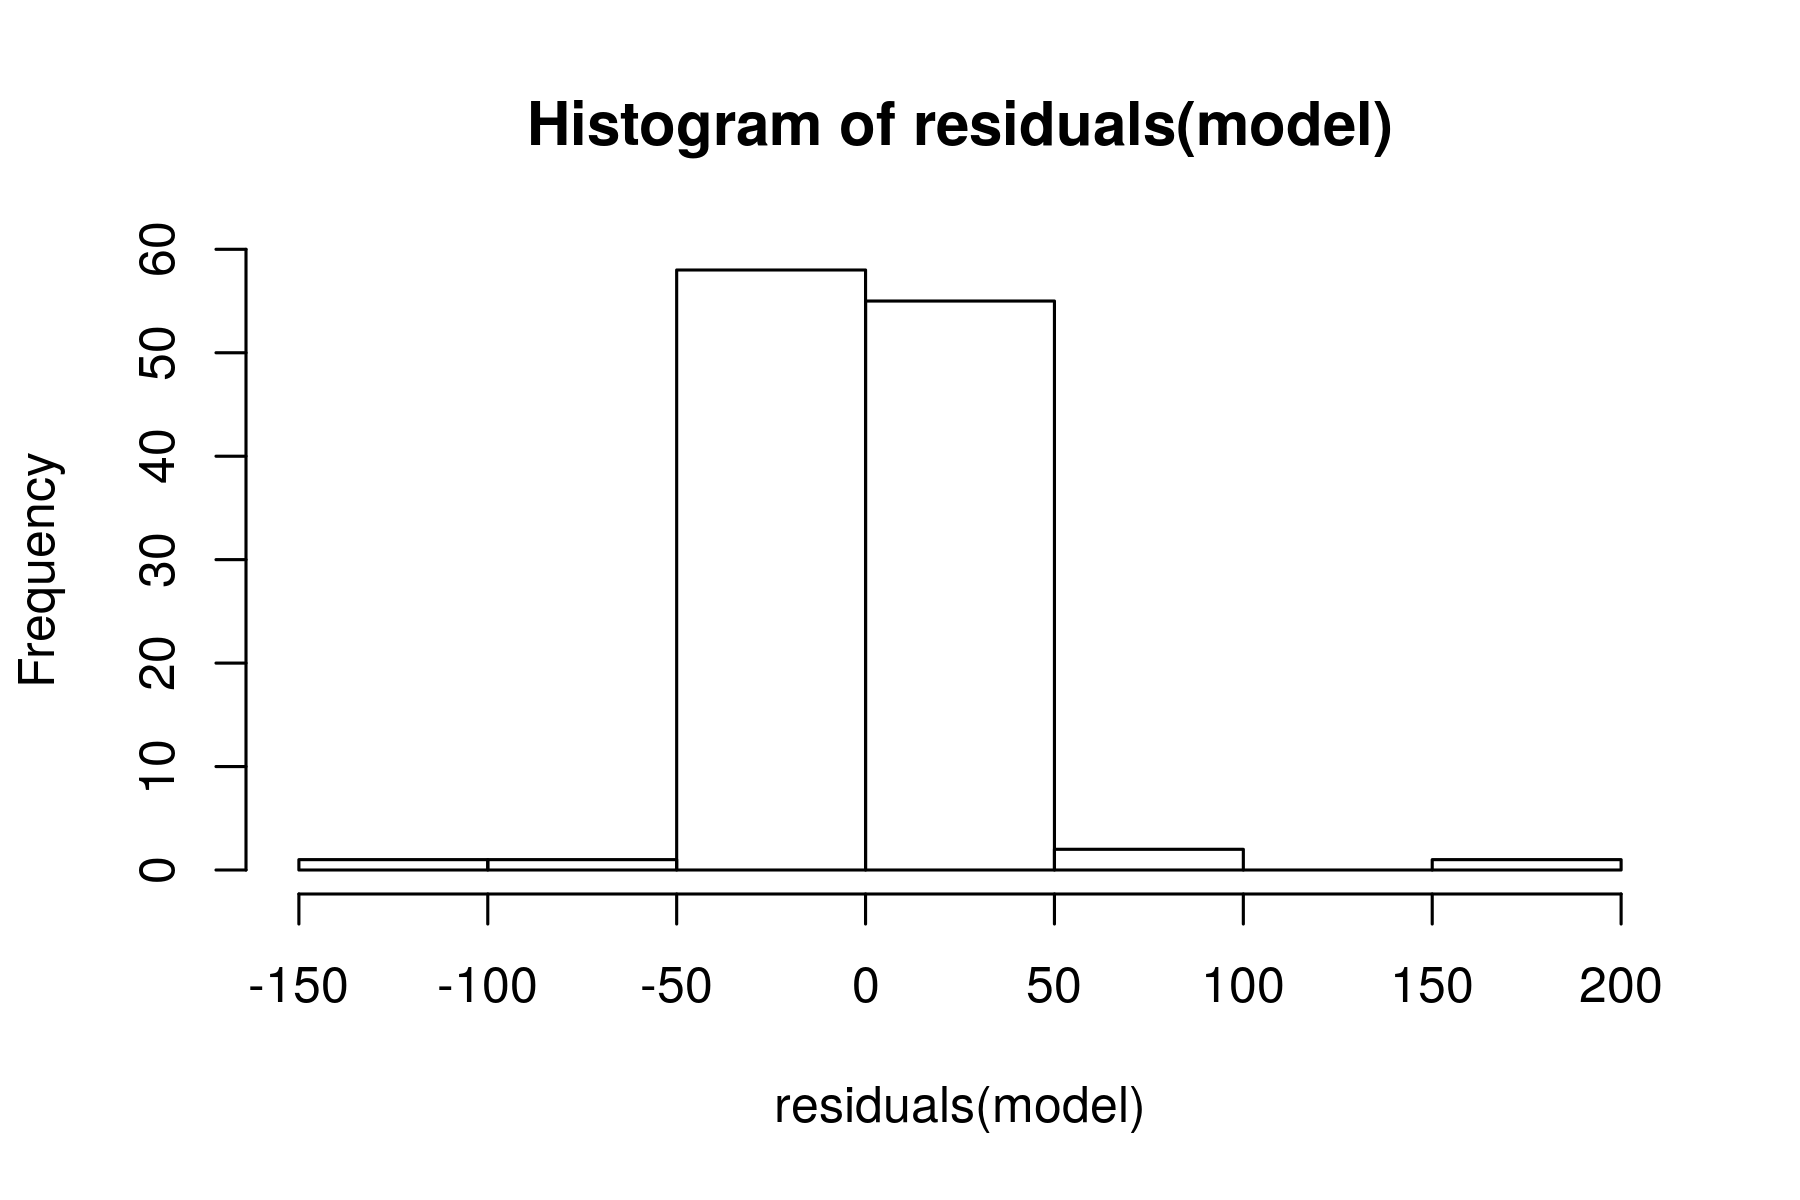

In [27]:
hist(residuals(model))

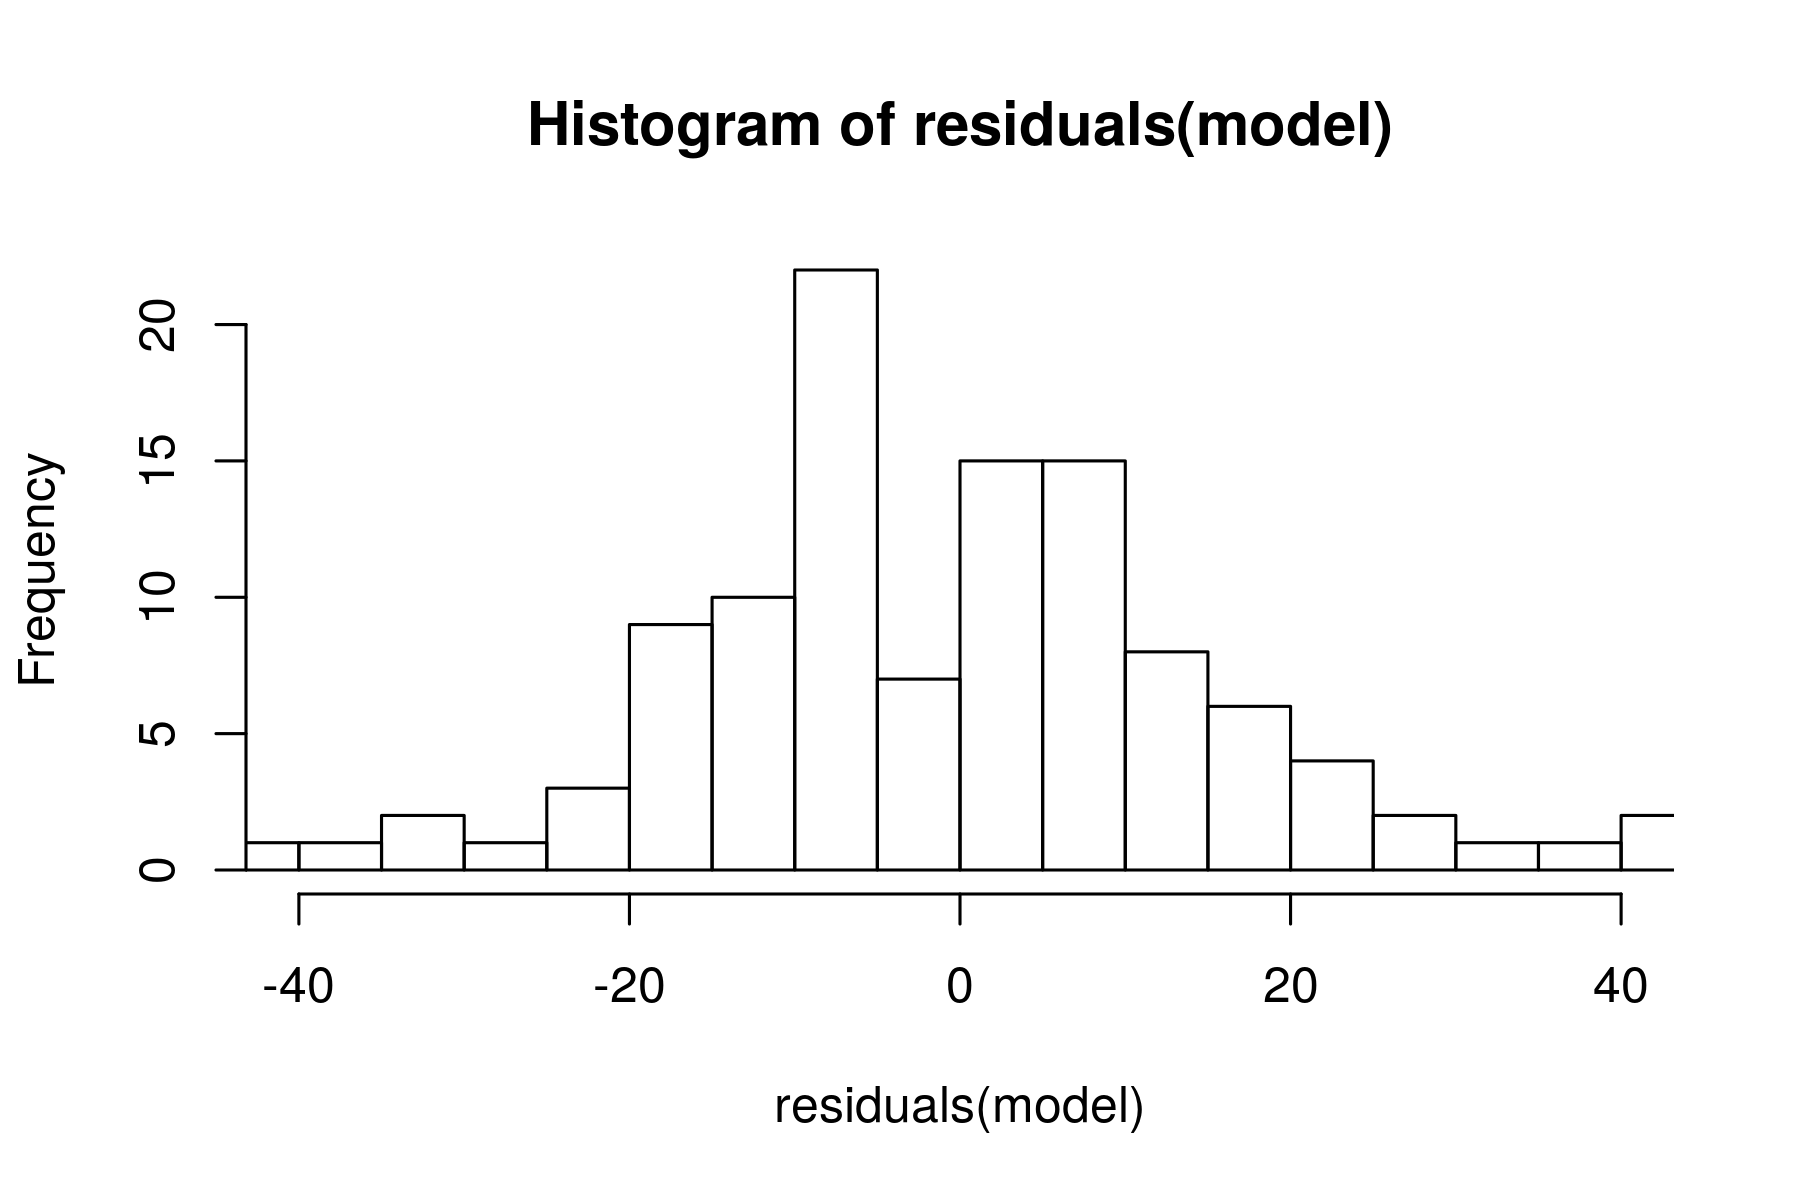

In [28]:
hist(residuals(model),breaks=100,xlim=c(-40, 40))

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [31]:
id.sol = as.character(df_madrid %>% filter(Neighbourhood == "Sol") %>% distinct(neighb_id))
id.sol

[1] "7"

In [32]:
#con los datos del enunciado da error, ya que no tenemos el numero de baños en el enunciado
#como es la magnitud que parece más representativa en el modelo, en vez de eliminarla, se va a estimar en 2

In [33]:
metros = predict(model,data.frame(neighb_id = id.sol, Bedrooms = 3, Price = 80, Accommodates = 6, Bathrooms = 2))
paste("Para los datos del enunciado y 2 baños, el modelo predice: ",round(metros,2),"metros cuadrados")

[1] "Para los datos del enunciado y 2 baños, el modelo predice:  125.41 metros cuadrados"

In [34]:
coefficients(model)["Bedrooms"]

Bedrooms 
16.80796

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [36]:
df_madrid_na <-df_madrid %>% filter(is.na(Square.Meters))
df_madrid_sqm <- df_madrid %>% filter(!is.na(Square.Meters))

df_madrid_pred <- predict(model, df_madrid_na)
length(df_madrid_pred)

[1] 5427

In [37]:
length(df_madrid_na$Square.Meters)

[1] 5427

In [38]:
df_madrid_na$Square.Meters <- df_madrid_pred
head(df_madrid_na)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Palacio,2,1,1,1,85,1,0,95,40.41697,-3.709439,50.69332,7
2,Malasaña,4,1,1,2,112,2,5,99,40.42319,-3.711249,44.86146,4
3,Palacio,8,3,3,4,190,6,40,96,40.41651,-3.717843,167.56064,7
4,La Latina,2,1,1,1,71,1,0,90,40.41200,-3.706691,39.32658,4
5,Embajadores,2,NA,1,NA,34,1,6,88,40.40809,-3.700322,NA,4
6,Embajadores,3,1,0,2,60,1,0,100,40.41085,-3.701099,23.95468,4


In [39]:
df_madrid_filled <- na.omit(rbind(df_madrid_sqm,df_madrid_na))
summary(df_madrid_filled)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms    
 Malasaña   : 594   Min.   : 1.000   Min.   :0.000   Min.   :0.000  
 Embajadores: 539   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000  
 La Latina  : 499   Median : 4.000   Median :1.000   Median :1.000  
 Sol        : 481   Mean   : 4.141   Mean   :1.244   Mean   :1.446  
 Cortes     : 360   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Justicia   : 341   Max.   :16.000   Max.   :6.000   Max.   :8.000  
 (Other)    :1932                                                   
      Beds           Price        Guests.Included   Extra.People    
 Min.   : 1.00   Min.   : 10.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.00   1st Qu.: 55.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.00   Median : 70.00   Median : 2.000   Median : 10.000  
 Mean   : 2.41   Mean   : 85.61   Mean   : 2.018   Mean   :  9.201  
 3rd Qu.: 3.00   3rd Qu.: 98.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.00   Max.   :800.00   

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [40]:
df_pca <- df_madrid_filled[,c('Accommodates','Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude', 'Square.Meters')]

In [41]:
summary(df_pca)

  Accommodates      Bathrooms        Bedrooms          Beds      
 Min.   : 1.000   Min.   :0.000   Min.   :0.000   Min.   : 1.00  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 1.00  
 Median : 4.000   Median :1.000   Median :1.000   Median : 2.00  
 Mean   : 4.141   Mean   :1.244   Mean   :1.446   Mean   : 2.41  
 3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.: 3.00  
 Max.   :16.000   Max.   :6.000   Max.   :8.000   Max.   :16.00  
     Price        Guests.Included   Extra.People     Review.Scores.Rating
 Min.   : 10.00   Min.   : 1.000   Min.   :  0.000   Min.   : 20.00      
 1st Qu.: 55.00   1st Qu.: 1.000   1st Qu.:  0.000   1st Qu.: 88.00      
 Median : 70.00   Median : 2.000   Median : 10.000   Median : 93.00      
 Mean   : 85.61   Mean   : 2.018   Mean   :  9.201   Mean   : 91.31      
 3rd Qu.: 98.00   3rd Qu.: 2.000   3rd Qu.: 15.000   3rd Qu.: 97.00      
 Max.   :800.00   Max.   :15.000   Max.   :276.000   Max.   :100.00      
    Latitude       L

In [42]:
pca <- prcomp(df_pca, center = TRUE, scale. = TRUE)

In [43]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5    PC6     PC7
Standard deviation     2.2131 1.1358 1.03976 1.00794 0.8680 0.7981 0.69955
Proportion of Variance 0.4452 0.1173 0.09828 0.09236 0.0685 0.0579 0.04449
Cumulative Proportion  0.4452 0.5625 0.66081 0.75317 0.8217 0.8796 0.92406
                           PC8     PC9    PC10    PC11
Standard deviation     0.60894 0.52691 0.38271 0.20105
Proportion of Variance 0.03371 0.02524 0.01332 0.00367
Cumulative Proportion  0.95777 0.98301 0.99633 1.00000

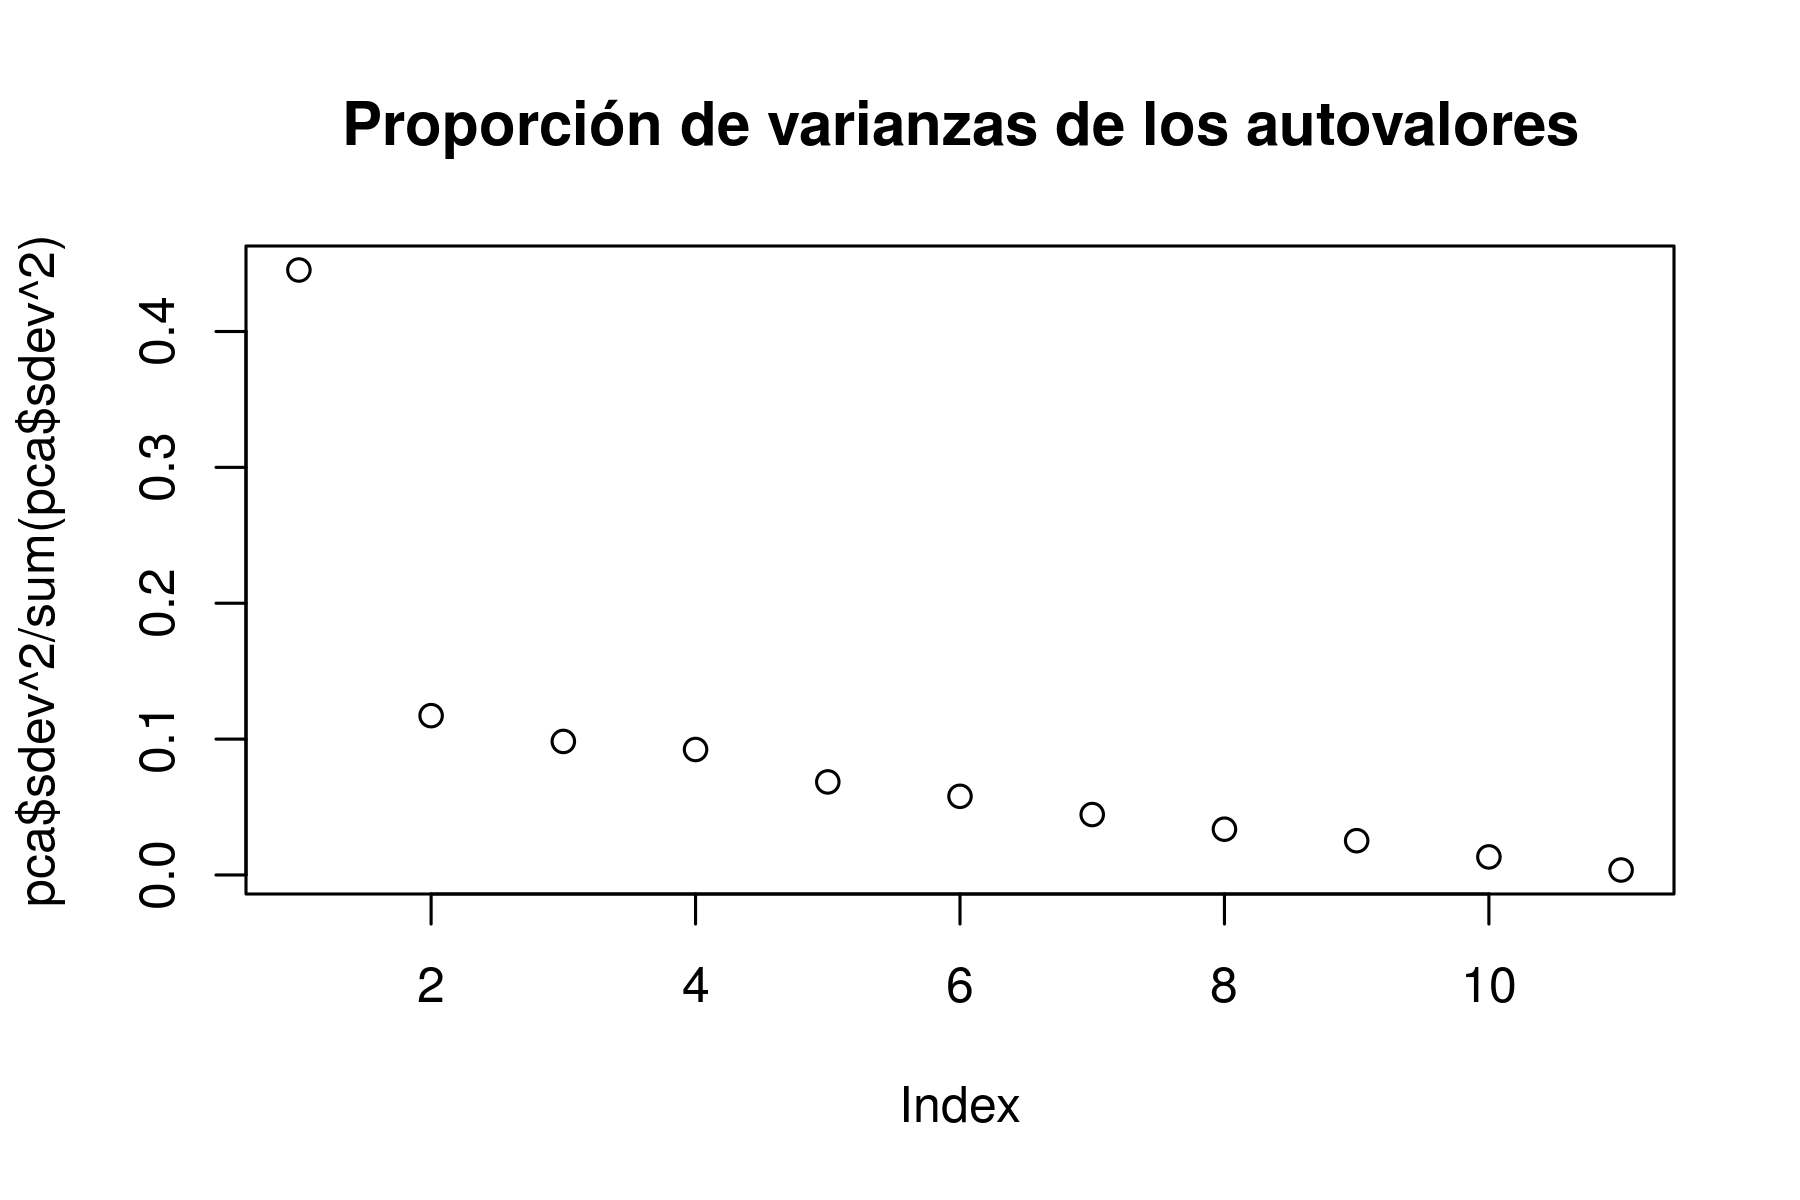

In [44]:
plot(pca$sdev^2/sum(pca$sdev^2),main = "Proporción de varianzas de los autovalores")

In [45]:
test_apartment = df_madrid_filled[3,]
test_apartment

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
3,Cuatro Caminos,4,2,1,1,46,2,7,93,40.45021,-3.699102,56.02051,3


In [46]:
df_predicciones <- as.data.frame(predict(pca, df_madrid_filled)[,1:6])
head(df_predicciones)
pred_house <- predict(pca,test_apartment)[,1:6]
pred_house

,PC1,PC2,PC3,PC4,PC5,PC6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9519102,0.41539962,0.5755506,-0.24805963,-0.3102009,-0.9229365
2,-4.6898635,-1.10744778,-0.1969651,-0.94191235,0.4660375,-2.2861801
3,0.3799068,-1.40225401,-0.2572134,0.28121916,1.3751947,-0.1335979
4,-0.7168102,0.17447550,-0.3904338,0.40150971,-1.3234207,0.3851518
5,2.0360666,-0.07525207,-0.1679607,-0.02942067,0.3185902,0.4315681
6,-2.1926828,-0.11246280,0.6281603,0.71412486,0.5027209,0.2794152


PC1        PC2        PC3        PC4        PC5        PC6 
 0.3799068 -1.4022540 -0.2572134  0.2812192  1.3751947 -0.1335979

In [47]:
distancias <- function(x1, x2){
    as.numeric(dist(rbind(x1,x2)))
}
distancias(c(1,1),c(2,2))

[1] 1.414214

In [48]:
df_predicciones <- df_predicciones %>% rowwise() %>% mutate(distance = distancias(c(PC1,PC2,PC3,PC4,PC5,PC6),pred_house))
df_predicciones$ID <- seq.int(nrow(df_predicciones))
head(df_predicciones)
#c(PC1,PC2,PC3,PC4,PC5,PC6)
df_order <- df_predicciones[order(df_predicciones$distance),]$ID[1:6]
df_order

PC1,PC2,PC3,PC4,PC5,PC6,distance,ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
-0.9519102,0.41539962,0.5755506,-0.24805963,-0.3102009,-0.9229365,3.084615,1
-4.6898635,-1.10744778,-0.1969651,-0.94191235,0.4660375,-2.2861801,5.722704,2
0.3799068,-1.40225401,-0.2572134,0.28121916,1.3751947,-0.1335979,0.000000,3
-0.7168102,0.17447550,-0.3904338,0.40150971,-1.3234207,0.3851518,3.357485,4
2.0360666,-0.07525207,-0.1679607,-0.02942067,0.3185902,0.4315681,2.458473,5
-2.1926828,-0.11246280,0.6281603,0.71412486,0.5027209,0.2794152,3.191373,6


[1]    3 1935 3491 1801 4472 1980

In [49]:
test_apartment
df_madrid_filled[df_order[2:6],]

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
3,Cuatro Caminos,4,2,1,1,46,2,7,93,40.45021,-3.699102,56.02051,3


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
2238,Rios Rosas,3,1,2,2,65,1,15,96,40.43973,-3.698350,68.55694,7
4093,Rios Rosas,4,1,1,1,100,2,10,89,40.44002,-3.698853,55.12928,7
2083,Cuatro Caminos,4,1,1,1,99,2,10,97,40.45581,-3.693486,41.39505,3
5275,Cuatro Caminos,4,1,1,2,95,1,0,91,40.45129,-3.695522,41.22599,3
2299,Cuatro Caminos,4,1,1,2,76,2,10,92,40.45400,-3.692522,40.42293,3


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?